# COSC 3337 Lab 07 (__Naive Bayes__) Minh Nguyen

## Exploratory Data Analysis

Import libraries

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

Load the dataset (since the dataset doesn't contain any column headers, so we need to add them manually)

In [76]:
adult_df = pd.read_csv('adult.csv', header=None)
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
                    'relationship','race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
                    'income']
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Let's do some checking stuff with the dataset

In [77]:
adult_df.shape

(32561, 15)

In [78]:
adult_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [79]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We can see that there're `categorical` and `numerical` columns. So it's a good practice to separate them into separate arrays so we can work with them in different cases.

In [80]:
categoricals = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex',
                'native_country', 'income']
numericals = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

Explore each one

In [81]:
adult_df[categoricals].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [82]:
adult_df[numericals].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


Does one sex tend to earn more than the other in this dataset?

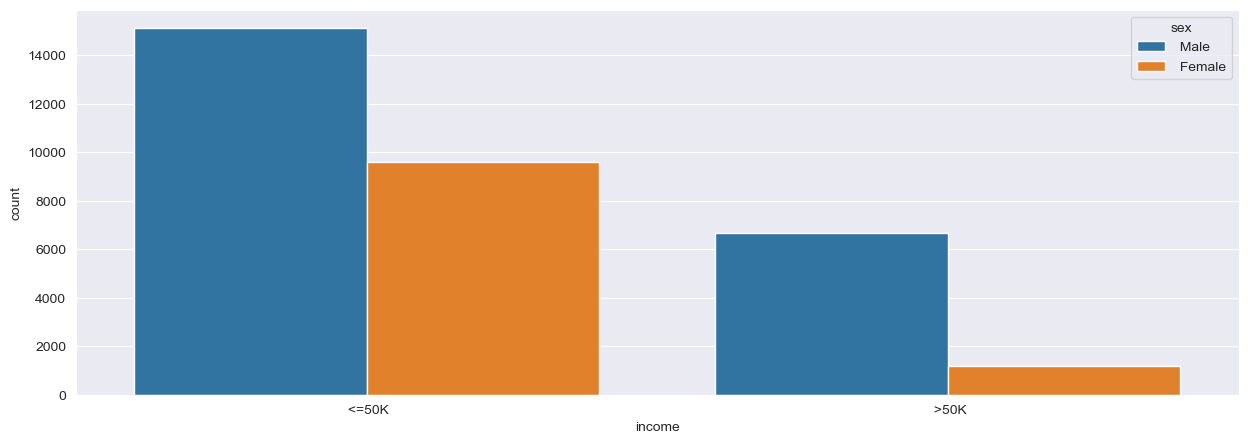

In [83]:
sns.countplot(x=adult_df['income'], hue='sex', data=adult_df)
plt.show()

How about the different types of jobs?

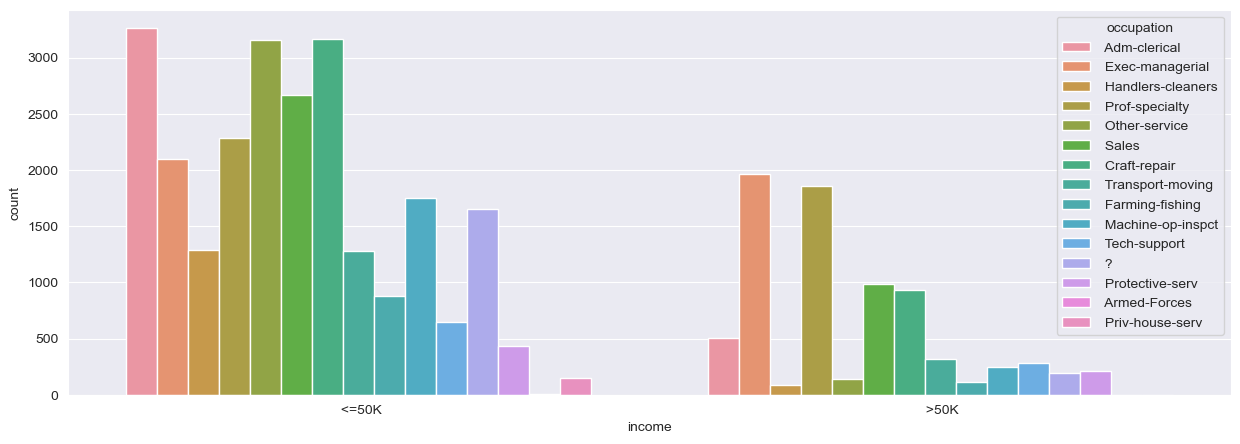

In [84]:
sns.countplot(x=adult_df['income'], hue='occupation', data=adult_df)
plt.show()

Let's see the races

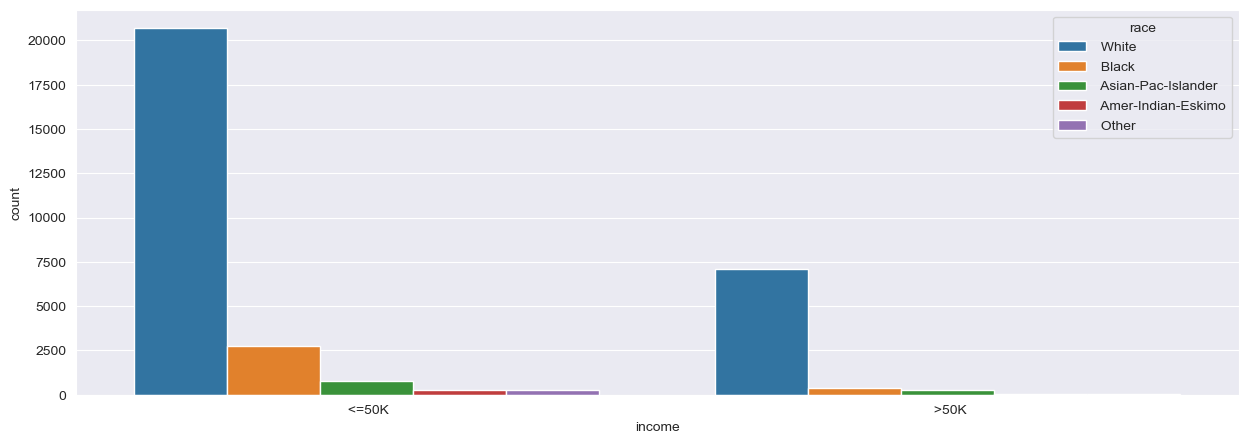

In [85]:
sns.countplot(x=adult_df['income'], hue='race', data=adult_df)
plt.show()

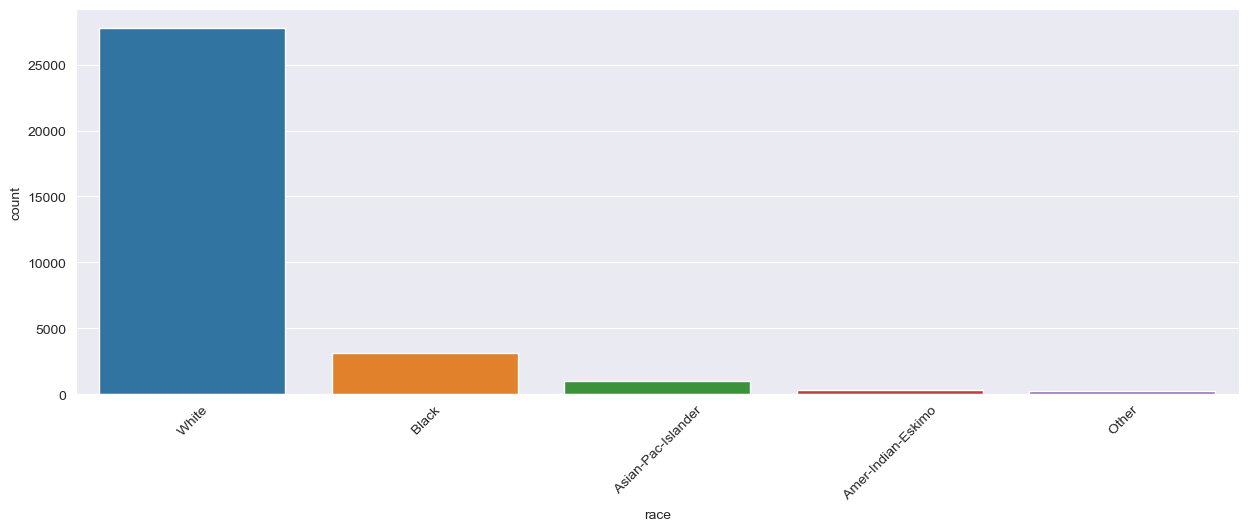

In [86]:
sns.countplot(x=adult_df['race'], order=adult_df['race'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

What's the most common education people in our dataset have?

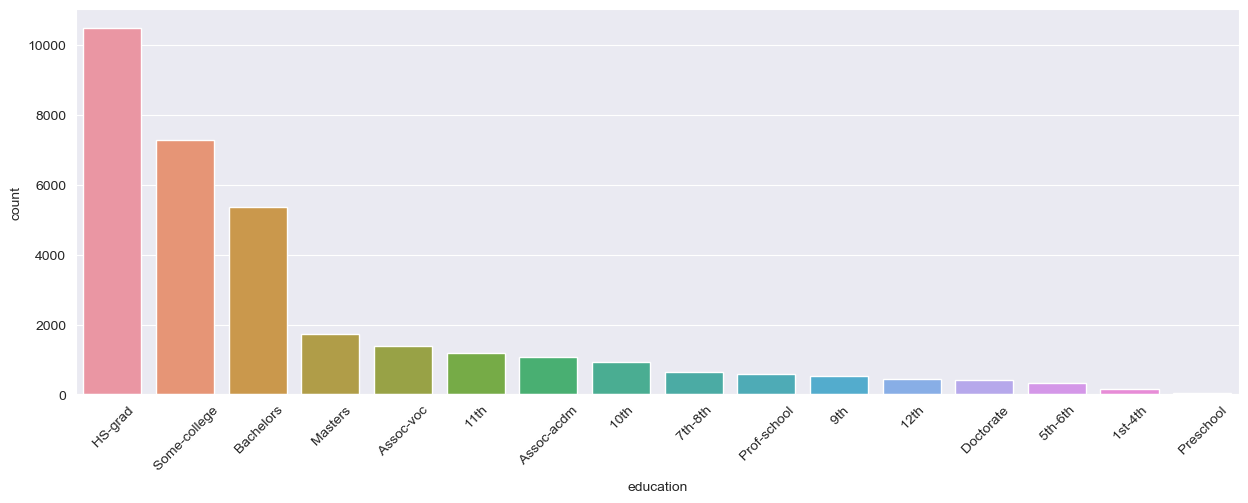

In [87]:
sns.countplot(x=adult_df['education'], order=adult_df['education'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

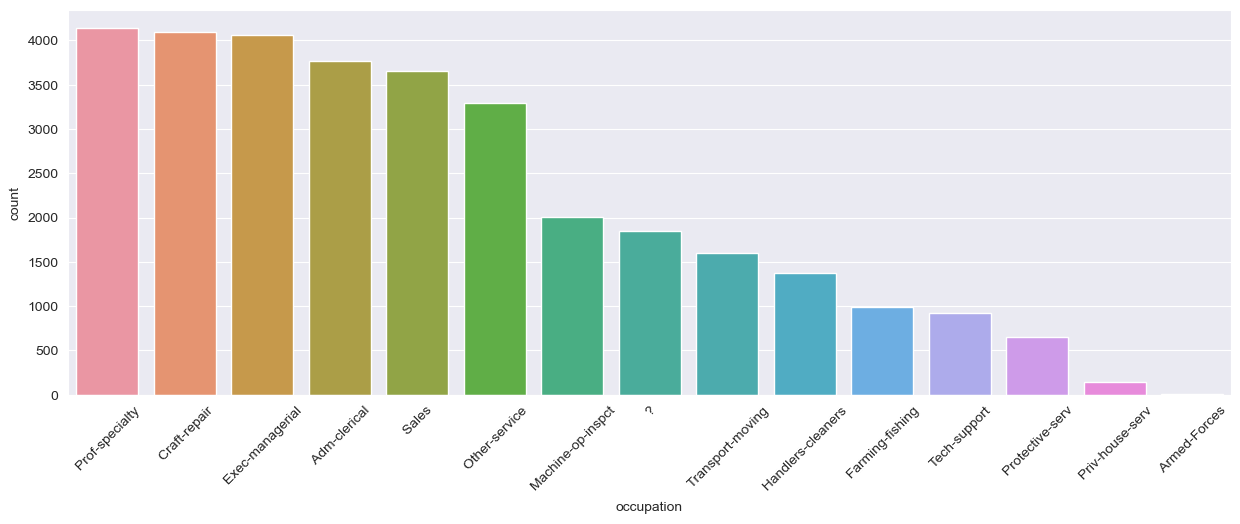

In [88]:
sns.countplot(x=adult_df['occupation'], data=adult_df, order=adult_df['occupation'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

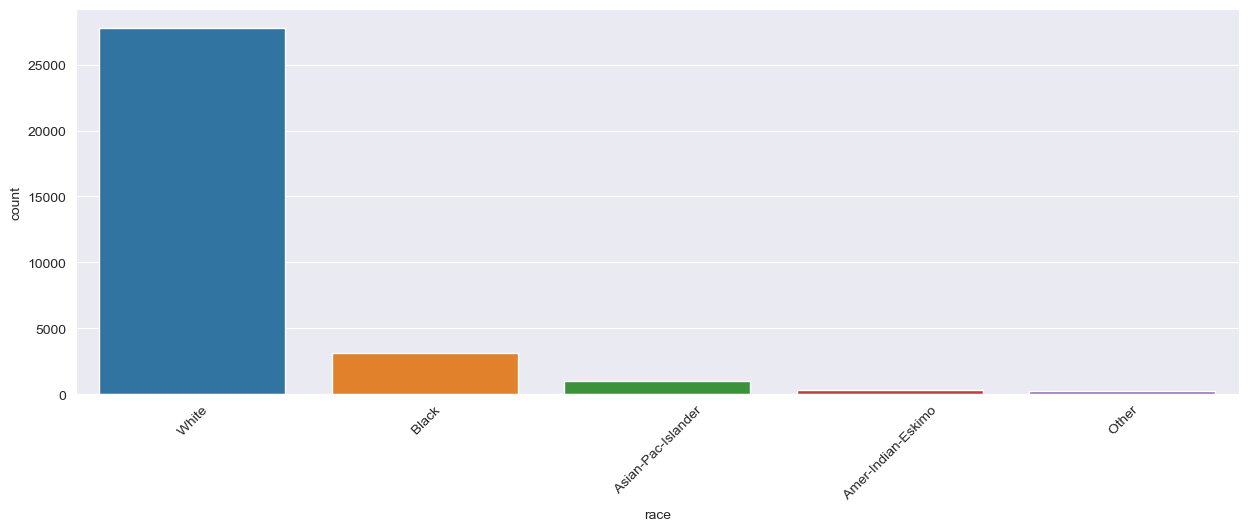

In [89]:
sns.countplot(x=adult_df['race'], order=adult_df['race'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

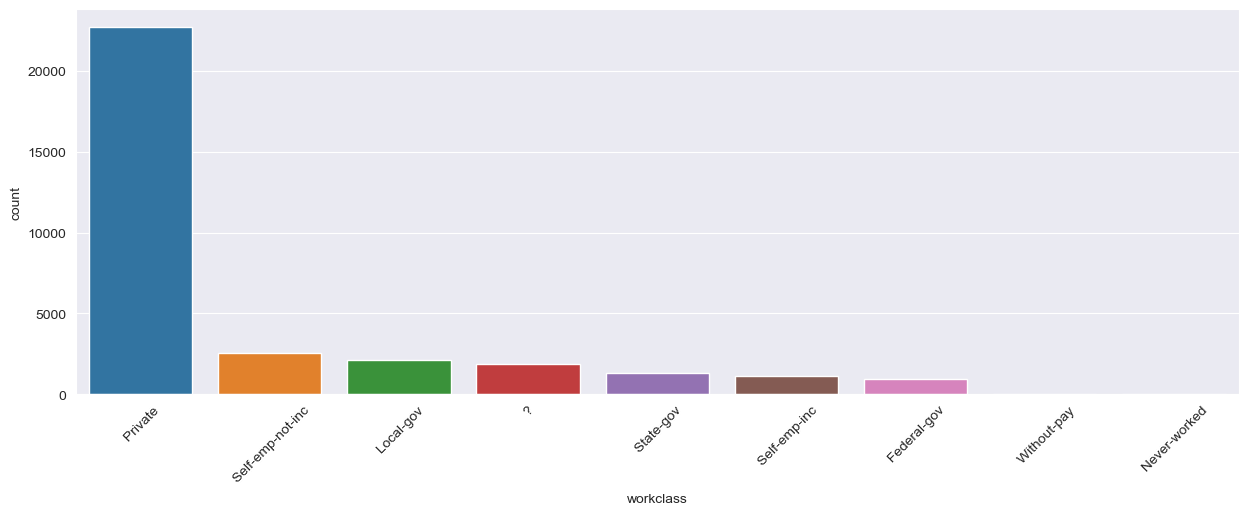

In [90]:
sns.countplot(x=adult_df['workclass'], order=adult_df['workclass'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

- The majority of people in this dataset are working privately.

We can see the `?` value in our charts. It means that there're some missing values in the dataset (but got replaced with `?` instead of `NULL/NaN`. It explains why when we used `info()`, we didn't see any non-null values)

As the result, we should go ahead and replace the `?` values with `NaN`.

In [91]:
# one space before the question mark because of the value saved in the dataset
adult_df['workclass'] = adult_df['workclass'].replace(' ?', np.NaN)
adult_df['occupation'] = adult_df['occupation'].replace(' ?', np.NaN)
adult_df['native_country'] = adult_df['native_country'].replace(' ?', np.NaN)

In [92]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Let's make a `barplot` to get a better idea of null values

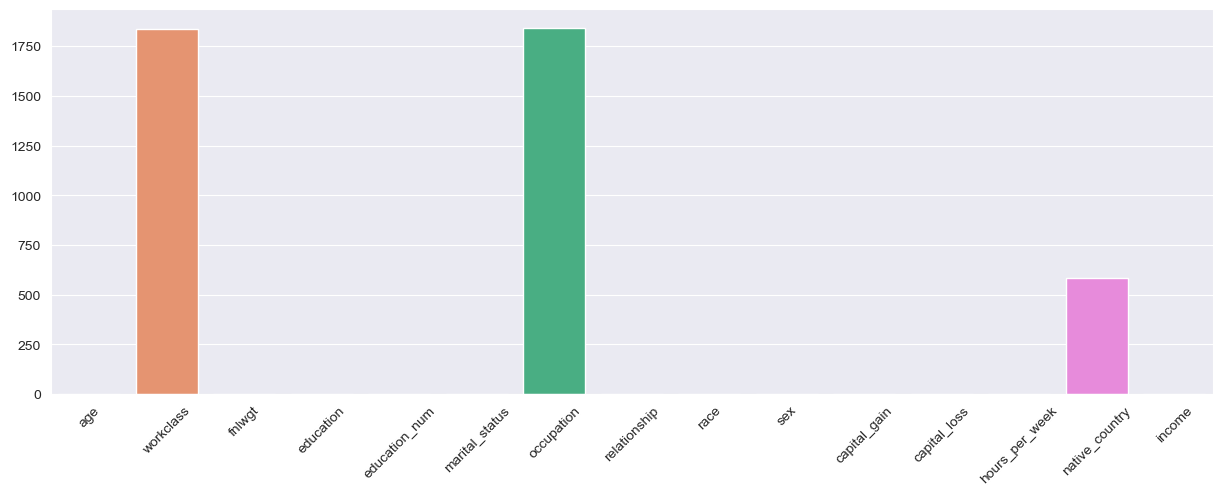

In [93]:
sns.barplot(x=adult_df.columns, y=adult_df.isnull().sum().values)
plt.xticks(rotation=45)
plt.show()

Let's move to the numerical variables.

In [94]:
adult_df[numericals].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


Let's check if there are any `?` missing values in any of the `numerical` columns like we had in the `categoricals`.

In [95]:
for variable in numericals:
    if not adult_df[adult_df[variable] == ' ?'].empty:
        print(f'{variable} contains missing values ( ?)')

Good news is we don't have any missing values in this set.

Let's take a look at the distributions of numerical variables.

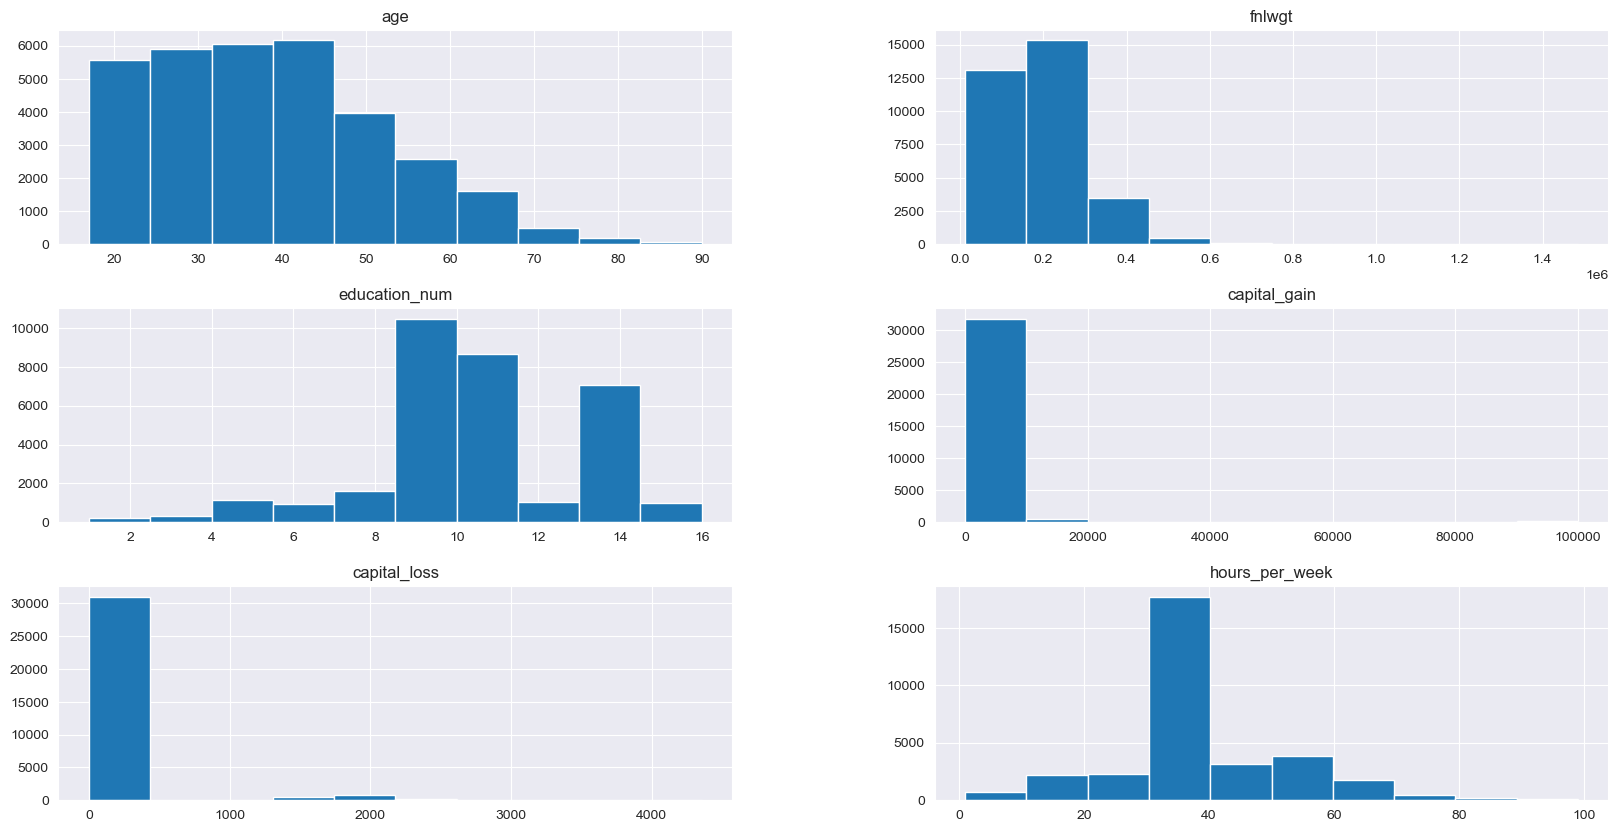

In [96]:
adult_df[numericals].hist(figsize=(20, 10))
plt.show()

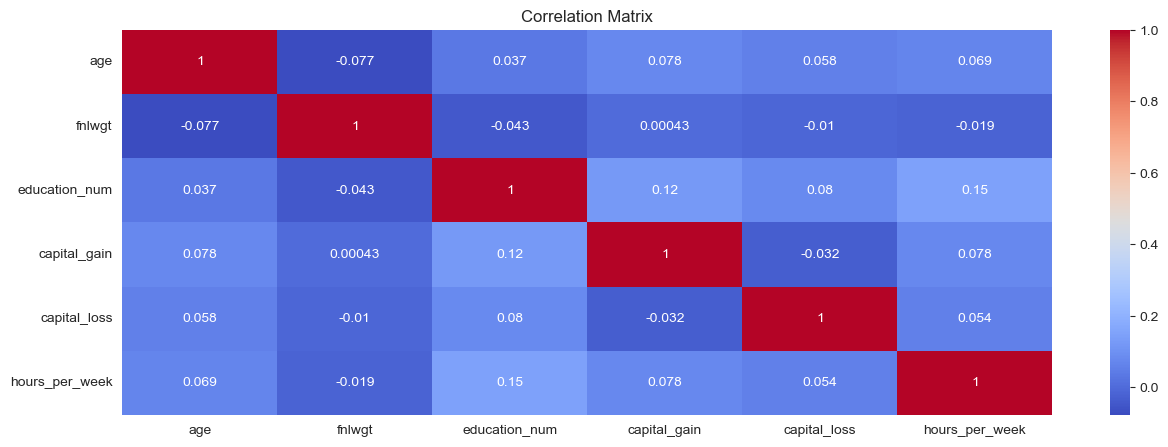

In [97]:
sns.heatmap(adult_df[numericals].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Pre-Processing

First, we have to take care of `NaN` values from the `categoricals` set. We can replace them the most frequent values (`mode`).

In [98]:
adult_df['workclass'].fillna(adult_df['workclass'].mode()[0], inplace=True)
adult_df['occupation'].fillna(adult_df['occupation'].mode()[0], inplace=True)
adult_df['native_country'].fillna(adult_df['native_country'].mode()[0], inplace=True)

Since they're categorical variables, we might have to encode them. Here, we use dummy variables.

In [99]:
adult_df = pd.get_dummies(data=adult_df, columns=categoricals, drop_first=True)
adult_df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Now, let's map all of our variables onto the same scale. Here we're using `RobustScaler`, which just scales features using statistics that are robust to outliers.

In [100]:
from sklearn.preprocessing import RobustScaler

# all columns except our target column for X
X = adult_df.drop('income_ >50K', axis=1)
y = adult_df['income_ >50K']

# create our scaler object
scaler = RobustScaler()

# use our scaler object to transform/scale our data and save it into X_scaled. Only need to
# transform numerical data.
X_scaled = scaler.fit_transform(X[numericals])

# reassign X[numericals] to the transformed numerical data.
X[numericals] = X_scaled

In [101]:
X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.10,-0.845803,1.000000,2174.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.65,-0.797197,1.000000,0.0,0.0,-5.4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.05,0.312773,-0.333333,0.0,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.80,0.472766,-1.000000,0.0,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.45,1.342456,1.000000,0.0,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Creating our Model

Begin creating and training our model

Import `train_test_split` and `GaussianNB`

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [103]:
# split data into 2 sets (training and testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# instantiate the model to train a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# fit the model on training data
gnb.fit(X_train, y_train)

GaussianNB()

## Model Evaluation

Import

In [104]:
# import accuracy_score to check the accuracy of predictions
from sklearn.metrics import accuracy_score
# import confusion_matrix to check the confusion matrix
from sklearn.metrics import confusion_matrix
# import classification_report to evaluate the classification model performance
from sklearn.metrics import classification_report
# import cross_validation
from sklearn.model_selection import cross_val_score

Let's make predictions off of the testing dataset.

In [105]:
y_pred = gnb.predict(X_test)

- Check _`accuracy_score`_ of the model

In [106]:
print('Model accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8278


Compare the training set and testing set accuracy

In [107]:
# predictions off of the training data
y_pred_train = gnb.predict(X_train)

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8252
Test set score: 0.8278


In [108]:
print('Model accuracy score (on training): {:.4f}'.format(accuracy_score(y_train, y_pred_train)))

Model accuracy score (on training): 0.8252


These two values are quite comparable, so there is no sign of overfitting.

- Confusion matrix results

In [109]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[6345 1019]
 [ 663 1742]]

True Positives(TP) =  6345

True Negatives(TN) =  1742

False Positives(FP) =  1019

False Negatives(FN) =  663


- Classification report

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      7364
           1       0.63      0.72      0.67      2405

    accuracy                           0.83      9769
   macro avg       0.77      0.79      0.78      9769
weighted avg       0.84      0.83      0.83      9769



- k-Fold Cross Validation

In [111]:
# Applying 10-Fold Cross Validation
scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:\n{}'.format(scores))

# compute Average cross-validation score
print('\nAverage cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:
[0.81754386 0.84298246 0.82667837 0.83018868 0.82799473 0.83150505
 0.81570864 0.81570864 0.82404563 0.81702501]

Average cross-validation score: 0.8249


In [112]:
# Applying 15-Fold Cross Validation
scores = cross_val_score(gnb, X_train, y_train, cv = 15, scoring='accuracy')
print('Cross-validation scores:\n{}'.format(scores))

# compute Average cross-validation score
print('\nAverage cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:
[0.81907895 0.82763158 0.84407895 0.82368421 0.83947368 0.81973684
 0.82434211 0.82817643 0.83410138 0.81895984 0.81435155 0.81105991
 0.82883476 0.81764319 0.81698486]

Average cross-validation score: 0.8245


- If we use the same scoring options, we'll get roughly the same average cross-validation score regardless of number of k

Here are some other cases of `scoring` parameter.

- _The proportion of true positive predictions to the total number of positive predictions_ 

In [113]:
# Applying 10-Fold Cross Validation
scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='precision')
print('Cross-validation scores:\n{}'.format(scores))

# compute Average cross-validation score
print('\nAverage cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:
[0.59302326 0.64485981 0.6152648  0.62302839 0.6192733  0.62884927
 0.5977918  0.59904153 0.61189358 0.59463487]

Average cross-validation score: 0.6128


- _The proportion of true positive predictions to the total number of actual positive instances_

In [114]:
# Applying 10-Fold Cross Validation
scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='recall')
print('Cross-validation scores:\n{}'.format(scores))

# compute Average cross-validation score
print('\nAverage cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:
[0.75       0.76102941 0.72744015 0.72744015 0.72191529 0.7145488
 0.69669118 0.68933824 0.71875    0.73345588]

Average cross-validation score: 0.7241
